In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
data,centers = make_blobs(n_samples=1000,centers=4,random_state=0)

In [8]:
def get_scatter_plot(data,centroids):
    plt.scatter(data[:,0],data[:,1],marker='o',color='orange',)
    #centroids = data[np.random.choice(data.shape[0],size=(4,))]
    plt.scatter(centroids[:,0],centroids[:,1],marker='o')
    plt.show()

old_centroid [[-2.46112359  8.11922957]
 [-0.80104369  7.21933889]
 [-0.83045519  6.59524368]
 [-2.34050001  2.39624075]]
new centroid [[-2.04296168  8.37648841]
 [-0.62340225  7.85165201]
 [ 0.60571902  4.93533649]
 [ 0.31095971  1.95233628]]


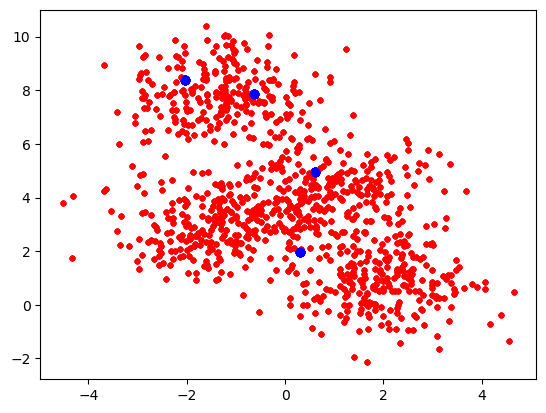

In [46]:
# intialization
centroids = data[np.random.choice(range(data.shape[0]),size=(4,))]
print('old_centroid',centroids)
dist_values = np.array([]).reshape(len(data),0)
for cntr in centroids:
    dist = np.sqrt(((data-cntr)**2).sum(axis=1)).reshape(-1,1)
    dist_values = np.hstack([dist_values,dist])

closest_index = np.argmin(dist_values,axis=1)

assigned_centroid = closest_index

for n in range(10):
    for cntr in range(len(centroids)):
        cluster_data = data[assigned_centroid==cntr]
        new_centroid = np.mean(cluster_data,axis=0)
        centroids[cntr] = new_centroid
        plt.scatter(cluster_data[:,0],cluster_data[:,1],color='red',marker='.')
        plt.scatter(centroids[cntr][0],centroids[cntr][1],color='blue',marker='o')

print('new centroid',centroids)


In [49]:
data
print(data.shape)

(1000, 2)


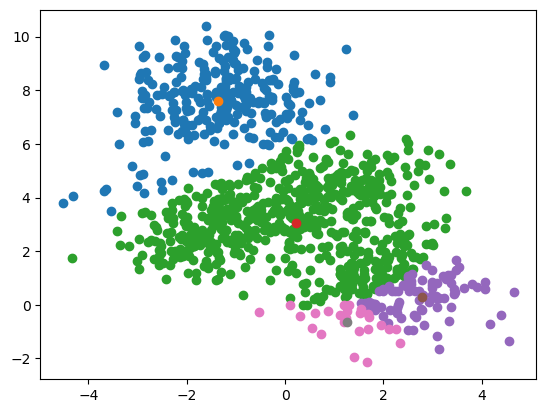

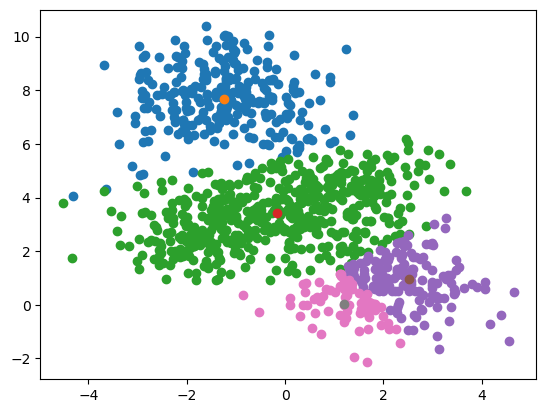

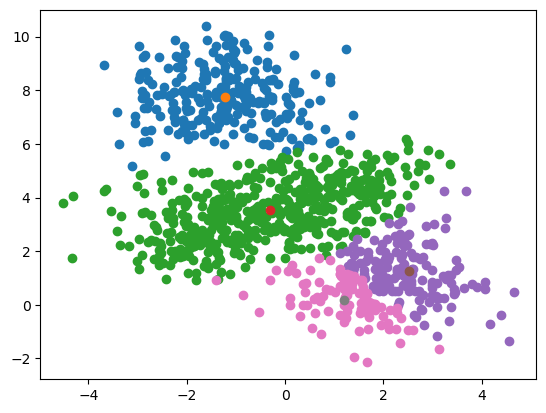

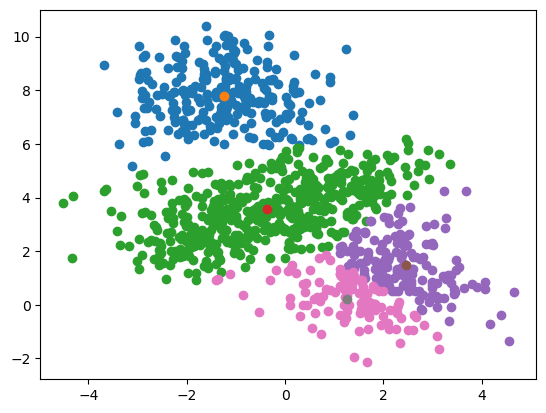

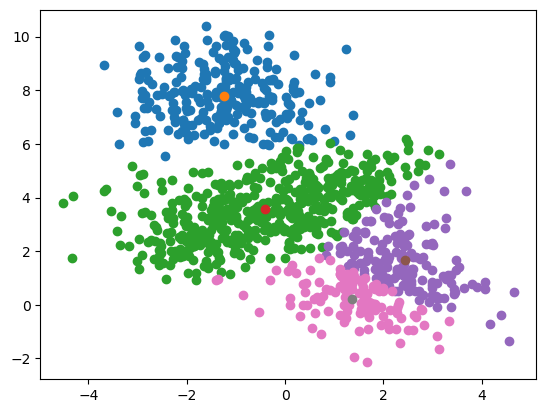

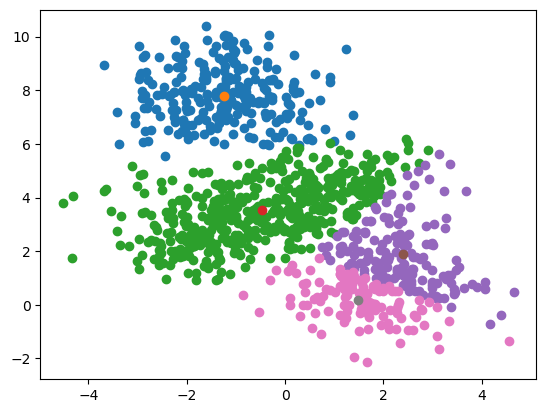

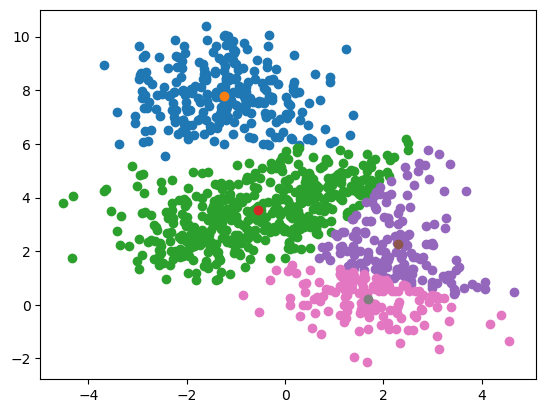

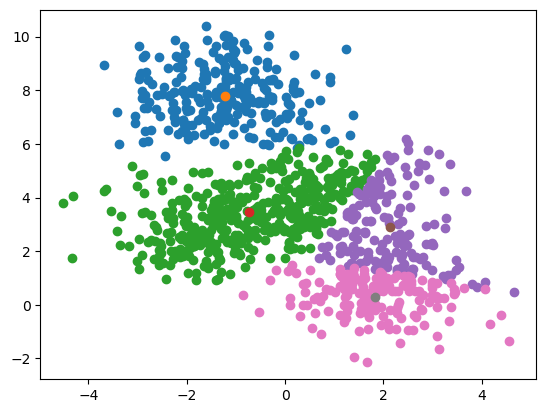

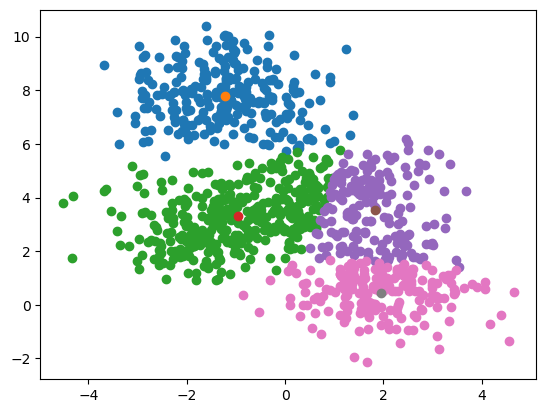

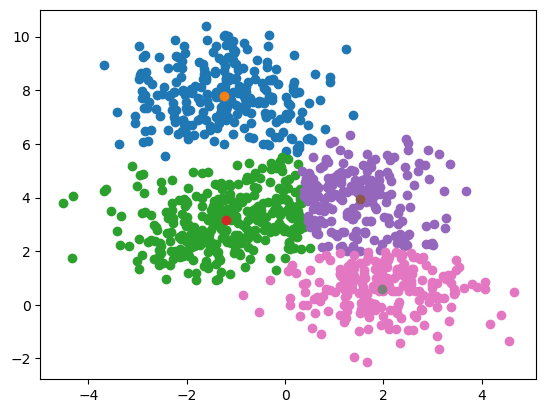

In [83]:
centroids = data[np.random.choice(range(data.shape[0]),size=(4,))]
def get_centorid_dist(data,centroids):
    distances = np.array([]).reshape(len(data),0)
    for c in centroids:
        dist = np.sqrt(((data - c)**2).sum(axis=1)).reshape(-1,1)
        distances = np.hstack([distances,dist])
    return distances

def get_update_centroid(data,centroids,num_iters):
    for n in range(num_iters):
        distance = get_centorid_dist(data,centroids)
        centers = np.argmin(distance,axis=1)
        for c in range(len(centroids)):
            c_data = data[centers==c]
            updated_centroid = c_data.mean(axis=0)
            centroids[c] = updated_centroid

            plt.scatter(c_data[:,0],c_data[:,1])
            plt.scatter(centroids[c][0],centroids[c][1])
        plt.show()

get_update_centroid(data,centroids,10)





In [84]:
import pandas as pd
import numpy as np 

In [85]:
df = pd.read_csv('E-commerce.csv')

In [88]:
df.drop('ID',axis=1,inplace=True)

In [89]:
df.head()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,130,65,213.905831,31.600751,233,235
1,543,46,639.223004,5.689175,228,170
2,520,102,1157.402763,844.321606,247,409
3,702,83,1195.903634,850.041757,148,200
4,221,84,180.754616,64.283300,243,259


In [91]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [92]:
X = df

In [94]:
X = MinMaxScaler().fit_transform(X)

In [98]:
k_means = [KMeans(n_clusters=k).fit(X) for k in range(1,10)]

In [103]:
inertia = [model.inertia_ for model in k_means]

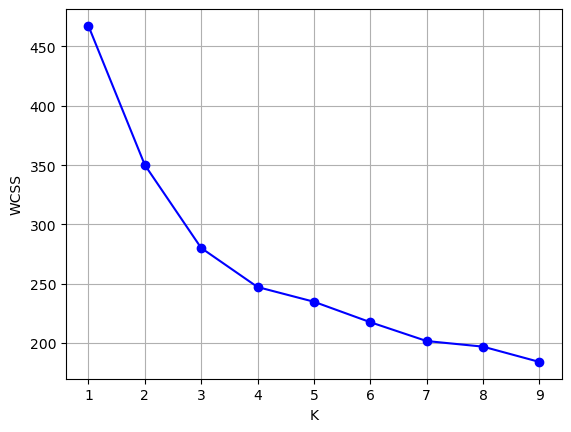

In [109]:
plt.plot(range(1,10),inertia,"bo-")
plt.xlabel("K")
plt.ylabel("WCSS")
plt.grid()
plt.show()